In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\solharsh\Desktop\Data Science\Amazon\reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In this example, Scores __less than 3__ are considered __Negative__ and __greater than or equal to 3__ are __Positive__. 

In [4]:
def polarity(x):
    if x < 3:
        return 'Negative'
    else:
        return 'Positive'
df["Score"] = df["Score"].map(polarity) #Map all the scores as the function polarity i.e. positive or negative
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,Positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,Negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,Positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,Negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,Positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Let's plot our data using the new score values: Positive and Negative. 

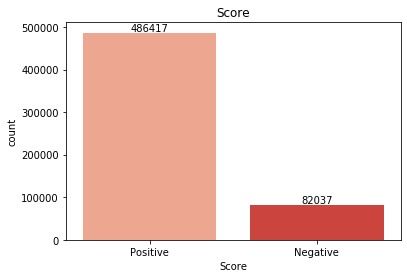

In [6]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure()
ax = sb.countplot(x=df["Score"], y = None, palette = "Reds")
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y), (x.mean(), y), ha='center', va='bottom') 
plt.title('Score')
plt.show()

We can see that the dataset is heavily imbalanced (21.3 K positive vs 3.7 K negative). We can either upsample the Negative class or downsample the Positive class. 

# Downsampling the Positive class: 

We will use sklearn's __resample()__ method for both upsampling and downsampling. Here, we will downsample positive scored data to match the negative scored number of records (82 K)

__Important note:__ Here, we want to use __replace=False__ because replace=True puts the selected record back to pool for the next selection. This can sample the same records many times (We want our data to be as diverse as possible).

In [7]:
from sklearn.utils import shuffle, resample

# Let's copy our dataframe so that we can use it clean for the upsampling example later.
df2 = df

# Let's seperate our data into two based on the Score (True of False). 
df_negative = df[df["Score"] == 'Negative']
df_positive = df[df["Score"] == 'Positive']

print("Number of records before downsampling: ")
print("Positive:", len(df_positive), "Negative:", len(df_negative))

# Let's use the resample function for downsampling. 
df_positive = resample(df_positive, replace=False, n_samples=len(df_negative))

# Let's put the separated data frames together. 
df = pd.concat([df_negative, df_positive], axis=0)

# Let's shuffle the data
df = shuffle(df)

print("Number of records after downsampling: ")
print("Positive:", len(df[df["Score"] == 'Positive']), "Negative:", len(df[df["Score"] == 'Negative']))

Number of records before downsampling: 
Positive: 486417 Negative: 82037
Number of records after downsampling: 
Positive: 82037 Negative: 82037


Let's plot the data frame again. 

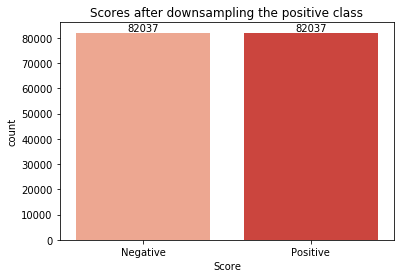

In [8]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure()
ax = sb.countplot(x=df["Score"], y = None, palette = "Reds")
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y), (x.mean(), y), ha='center', va='bottom') 
plt.title('Scores after downsampling the positive class')
plt.show()

# Upsampling the Negative class: 

We will use sklearn's __resample()__ method for both upsampling and downsampling. Here, we will upsample negative scored data to match the positive scored number of records (486.4 K)

__Important note:__ For upsampling, we have to use __replace=True__ 

In [10]:
from sklearn.utils import shuffle, resample

# Let's seperate our data into two based on the Score (True or False). 
df_negative = df2[df2["Score"] == 'Negative']
df_positive = df2[df2["Score"] == 'Positive']

print("Number of records before upsampling: ")
print("Positive:", len(df_positive), "Negative:", len(df_negative))

# Let's use the resample function for upsampling.
df_negative = resample(df_negative, replace=True, n_samples=len(df_positive))

# Let's put the separated data frames together. 
df2 = pd.concat([df_negative, df_positive], axis=0)

# Let's shuffle the data
df2 = shuffle(df2)

print("Number of records after upsampling: ")
print("Positive:", len(df2[df2["Score"] == 'Positive']), "Negative:", len(df2[df2["Score"] == 'Negative']))

Number of records before upsampling: 
Positive: 486417 Negative: 486417
Number of records after upsampling: 
Positive: 486417 Negative: 486417


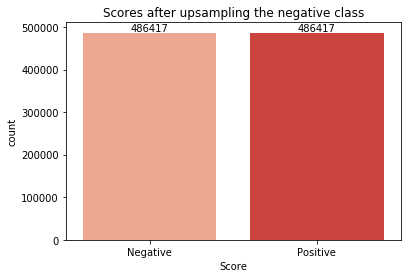

In [11]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure()
ax = sb.countplot(x=df2["Score"], y = None, palette = "Reds")
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y), (x.mean(), y), ha='center', va='bottom') 
plt.title('Scores after upsampling the negative class')
plt.show()